In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def graficar_barras_con_colores(datos, labels, xlabel, ylabel, title, varianzas, miny=None, maxy=None):
    # Verificar que los datos y las etiquetas tengan la misma longitud
    if len(datos) != len(labels):
        raise ValueError("La longitud de los datos y las etiquetas debe ser la misma.")

    # Crear la figura y el eje
    x = np.arange(len(labels))
    width = 0.5

    fig, ax = plt.subplots()
    
    colores = list(mcolors.TABLEAU_COLORS)  # Puedes cambiar la paleta de colores si lo prefieres

    # Crear las barras con colores diferentes
    for i, (valor, etiqueta) in enumerate(zip(datos, labels)):
        color = colores[i % len(colores)]  # Seleccionar el color correspondiente
        if varianzas is None:
            ax.bar(x[i], valor, width, color=color, label=etiqueta)
        else:
            ax.bar(x[i], valor, width, yerr=varianzas[i], capsize=5, color=color, label=etiqueta)
    
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Establecer las etiquetas de las barras
    ax.set_xticks(range(len(datos)))
    ax.set_xticklabels(labels)
    
    if miny is not None and maxy is not None:
        plt.ylim(miny, maxy)

    # Mostrar la gráfica
    plt.show()

In [1]:
import json
import numpy as np
from TP2.main import *
import pandas as pd

gen
multigen
completa
limitada


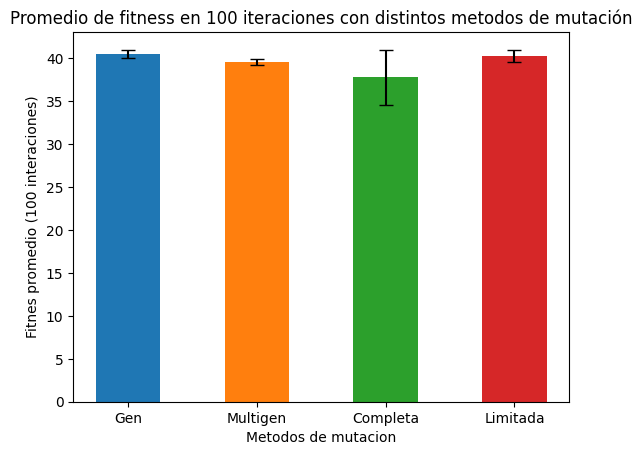

[40.4913839989565, 39.55062104808819, 37.802284116866986, 40.27311887181966]


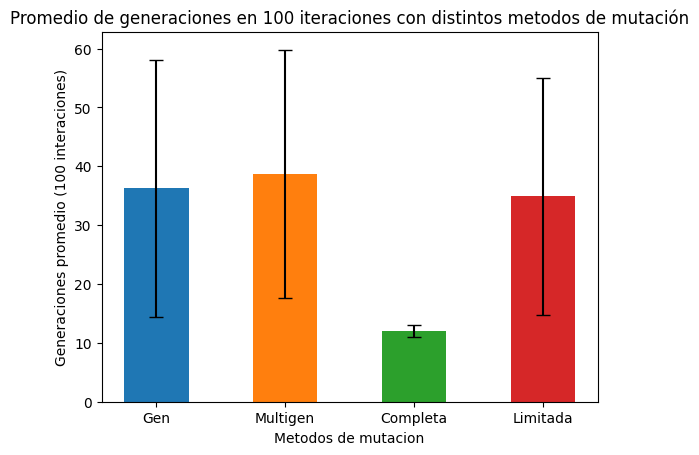

[36.27, 38.73, 11.97, 34.89]


In [3]:



#probabiliadd de mutacion en 0.7 y el resto arbitrario
#tenemos 8 mutaciones a analizar:
#   gen, multigen, completa, limitada. uniforme y no uniforme.

#Elegimos warrior y defensa aribitrario 

#El resultado -> ver que metodo de mutacion es el mejor. -> para ese metodo ver que % es el mejor.
resultados = []
varianzas = []
gen = []
varianza_gen = []
metodos_mutacion = ["gen","multigen","completa","limitada"]
for metodo in metodos_mutacion:
    crear_configuracion_mutacion(0.5, metodo, None)
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        gen.append(np.mean(simulacion[:, 0]))
        varianzas.append(np.var(simulacion[:,2]))
        varianza_gen.append(np.var(simulacion[:, 0]))


graficar_barras_con_colores(resultados, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", varianzas)
print(resultados)

min_varianza = min(varianza_gen)
graficar_barras_con_colores(gen, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Generaciones promedio (100 interaciones)", "Promedio de generaciones en 100 iteraciones con distintos metodos de mutación", varianza_gen/min_varianza)
print(gen)

gen
multigen
completa
limitada


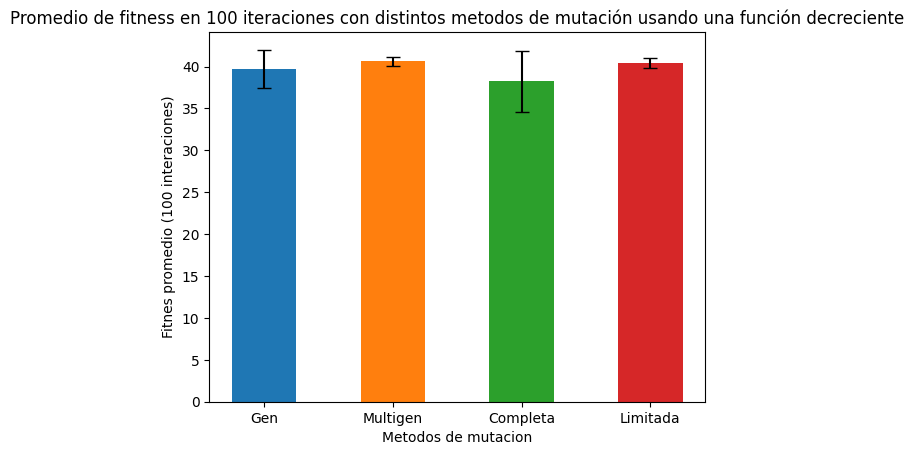

[39.70302116954384, 40.619818318020435, 38.24842577853539, 40.42543958204339]


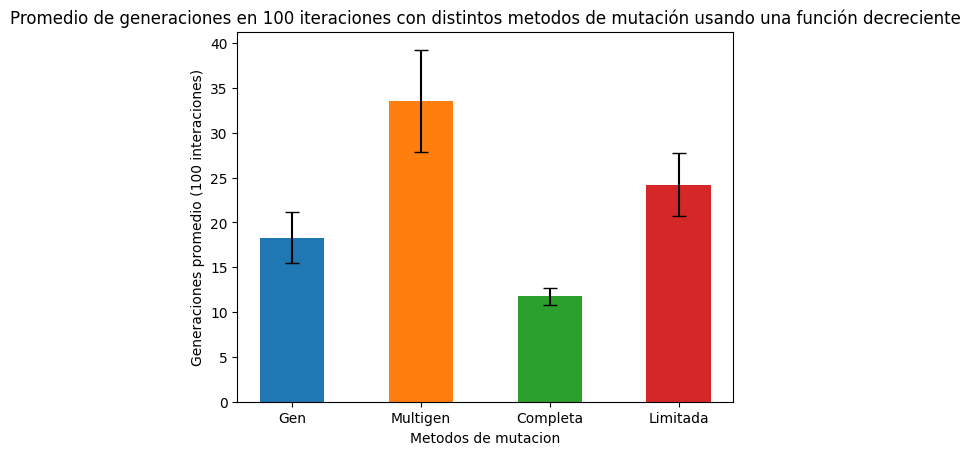

[18.3, 33.59, 11.74, 24.19]


In [4]:

gen = []
varianzas = []
resultados = []
varianza_gen = []
for metodo in metodos_mutacion:
    crear_configuracion_mutacion(0.5, metodo, 'decreciente')
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        gen.append(np.mean(simulacion[:, 0]))
        varianzas.append(np.var(simulacion[:,2]))
        varianza_gen.append(np.var(simulacion[:, 0]))

graficar_barras_con_colores(resultados, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación usando una función decreciente", varianzas)
print(resultados)

min_varianza = min(varianza_gen)
graficar_barras_con_colores(gen, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Generaciones promedio (100 interaciones)", "Promedio de generaciones en 100 iteraciones con distintos metodos de mutación usando una función decreciente", varianza_gen/min_varianza)
print(gen)

#Estamos viendo que metodo de mutacion es el que mejor fitness promedio nos da. Se puede ver que 
# no depende tanto del metodo.

#CHECKEAR SI ESTA OK GRAFICAR SOLO EL PROMEDIO O TAMBIEN MAXIMOS MINIMOS 

multigen
multigen


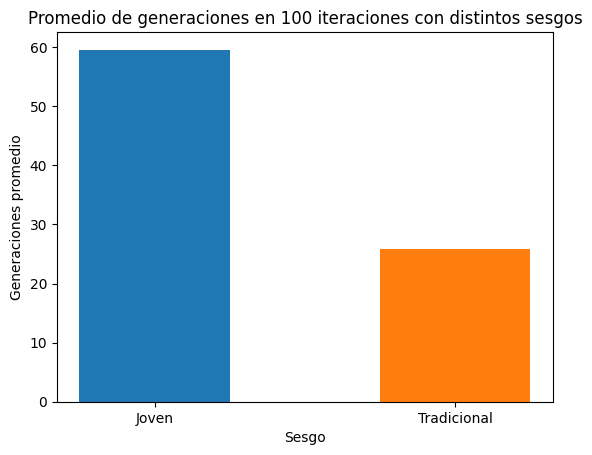

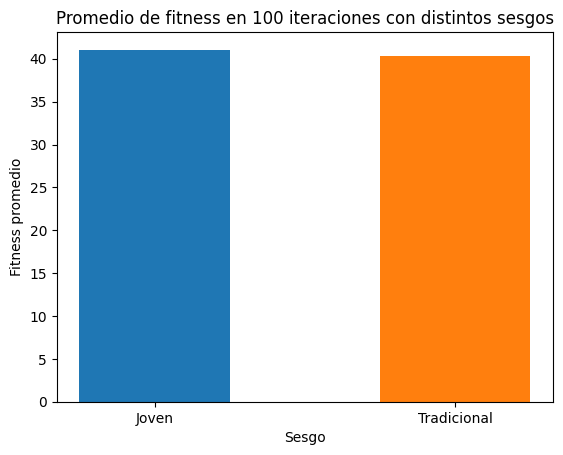

[59.57, 25.79]


In [9]:
#Ver si es mejor tradicional o joven (FIJAMOS GEN)

resultados = []
fitnessPromedio = []
crear_configuracion_sesgo(True)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))

crear_configuracion_sesgo(False)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))
        
graficar_barras_con_colores(resultados, ["Joven", 'Tradicional'], "Sesgo", "Generaciones promedio", "Promedio de generaciones en 100 iteraciones con distintos sesgos", None)


graficar_barras_con_colores(fitnessPromedio, ["Joven", 'Tradicional'], "Sesgo", "Fitness promedio", "Promedio de fitness en 100 iteraciones con distintos sesgos", None)
print(resultados)


#Viendo el grafico se puede ver que luego de 100 iteraciones se consige el mismo fitness promedio  pero en el caso del sesgo joven, se consigue en mayor cantidad de generaciones (tarda mas en converger y llega al mismo resultado -> mas lento)


multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen


TypeError: 'int' object is not subscriptable

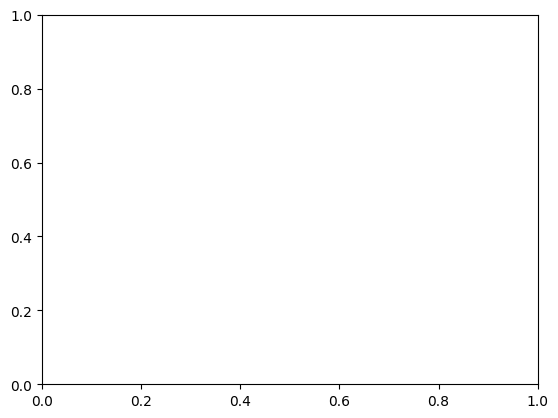

In [6]:


#Tipos de seleccion
#Agarramos 
metodos_seleccion = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzmann", "ranking"]
#TODO: TENEMOS Q HACER GRAFICOS DE FITNESS ANTES PARA DESCARTAR RANKING Y DSPS DE LOS OTROS SE HACEN LOS DE GENERACIONES
resultados = []
varianza = []
for metodo1 in metodos_seleccion:
    resultados_metodo = []
    varianza_metodo = []
    for metodo2 in metodos_seleccion:
        crear_configuracion_seleccion(metodo1, metodo2)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 0]))
            varianza_metodo.append(np.var(simulacion[:, 0]))
            # print(simulacion[:, 0], np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo) 
    varianza.append(varianza_metodo)
    
for i, res in enumerate(resultados):
    #para normalizar la varianza vamos a dividirla por la minima
    varianza_minima = min(varianza[i])
    titulo = "Promedio del generaciones del metodo de selección " + metodos_seleccion[i] + " iterado 100 veces combinado con otros métodos"
    graficar_barras_con_colores(res, metodos_seleccion, "Metodos de seleccion", titulo, varianza[i]/varianza_minima, 0, 100)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)

print(df_resultados)

#Nos esta dando una varianza gigantesca. 
#Conclusion: Depende mucho de la tirada pero suele ser elite con universal. CHECKEAR




In [ ]:
#Metodos de reemplazo
#Repetir similar al anterior pero eligiendo ya los metodos 1 y 2, misma secuencia pero para los 3 y 4. 
#Elegimos boltzmann y universal como metodos de seleccion
metodos_reemplazo = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzmann", "ranking"]

resultados = []
varianza = []
for metodo3 in metodos_reemplazo:
    resultados_metodo = []
    varianza_metodo = []
    for metodo4 in metodos_reemplazo:
        crear_configuracion_reemplazo(metodo3, metodo4)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 2]))
            varianza_metodo.append(np.var(simulacion[:, 2]))
            # print(simulacion[:, 0], np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo)
    varianza.append(varianza_metodo)

multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen
multigen


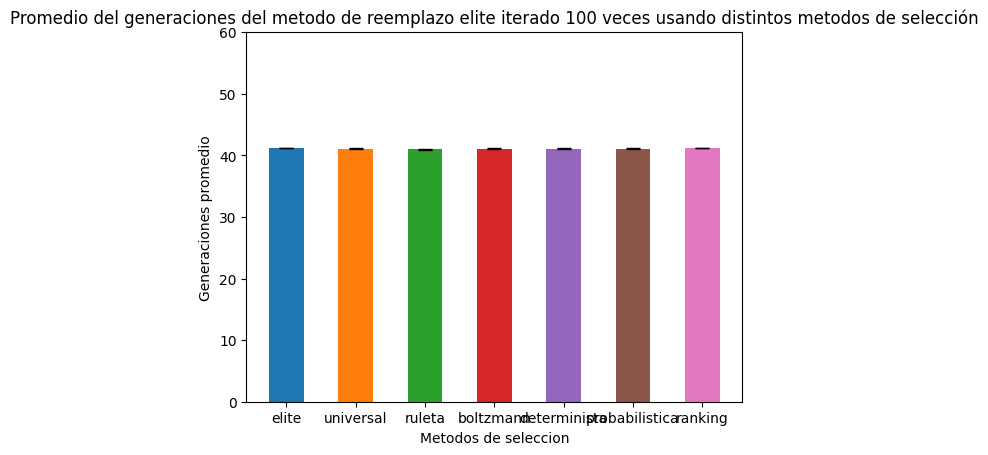

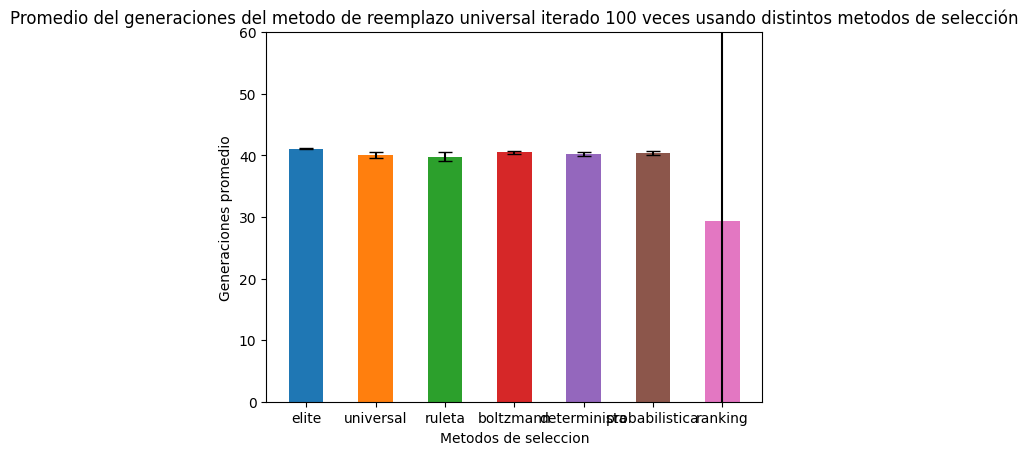

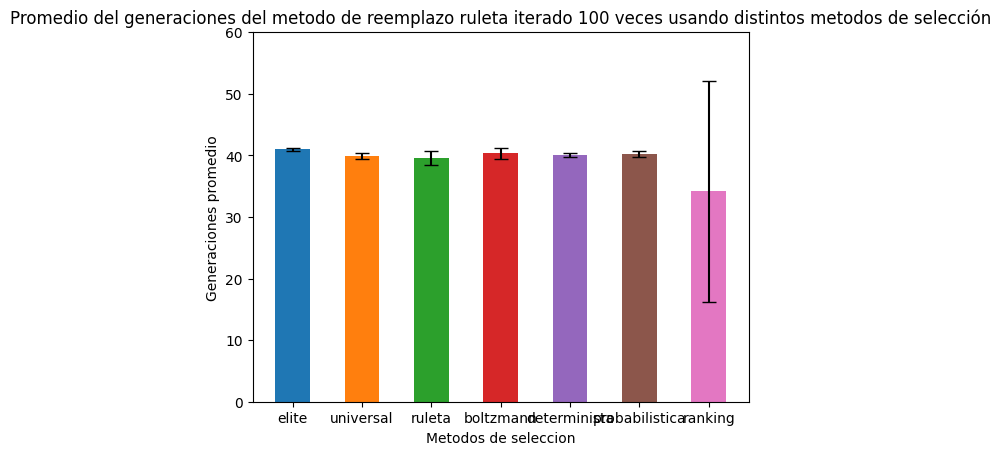

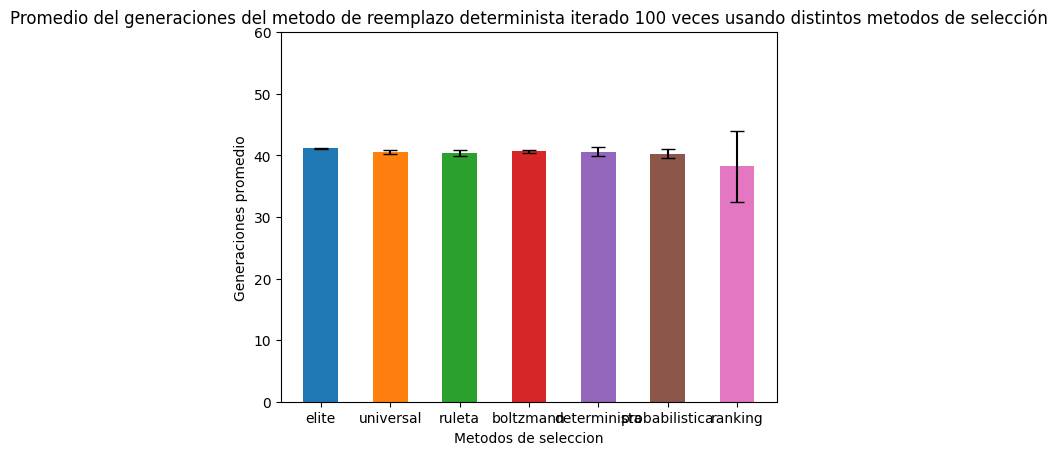

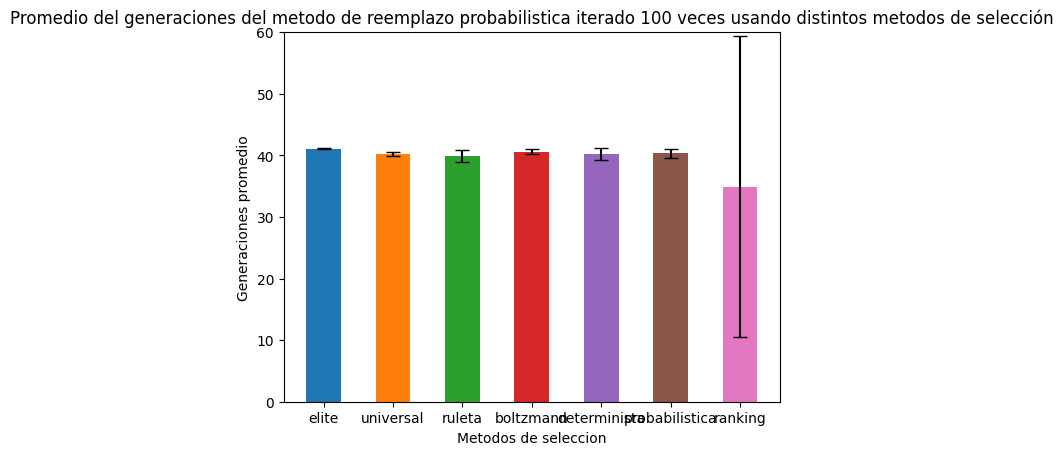

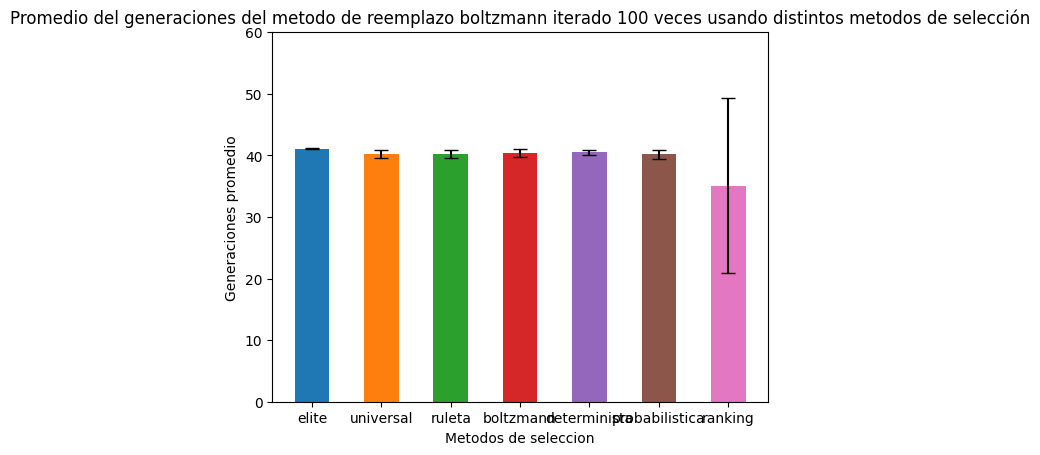

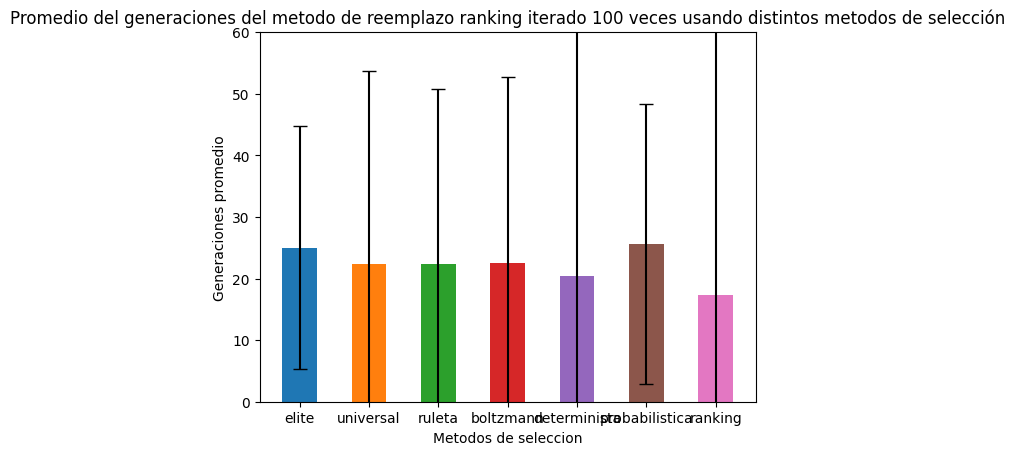

NameError: name 'pd' is not defined

In [11]:

for i, res in enumerate(resultados):
    titulo = "Promedio del generaciones del metodo de reemplazo " + metodos_reemplazo[i] + " iterado 100 veces usando distintos metodos de selección"
    graficar_barras_con_colores(res, metodos_seleccion, "Metodos de seleccion", "Generaciones promedio", titulo, varianza[i],0,60)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)

print(df_resultados)

multigen
multigen
multigen
multigen


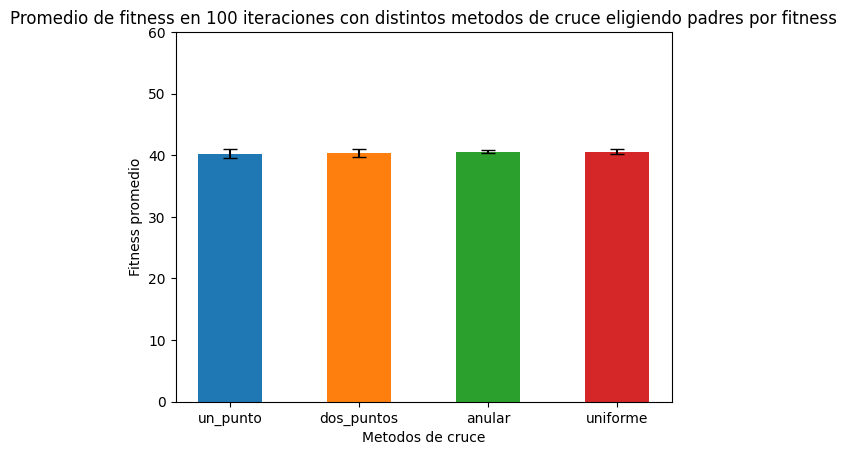

[40.262045887094025, 40.39520427281139, 40.57217651379917, 40.54570529455455]


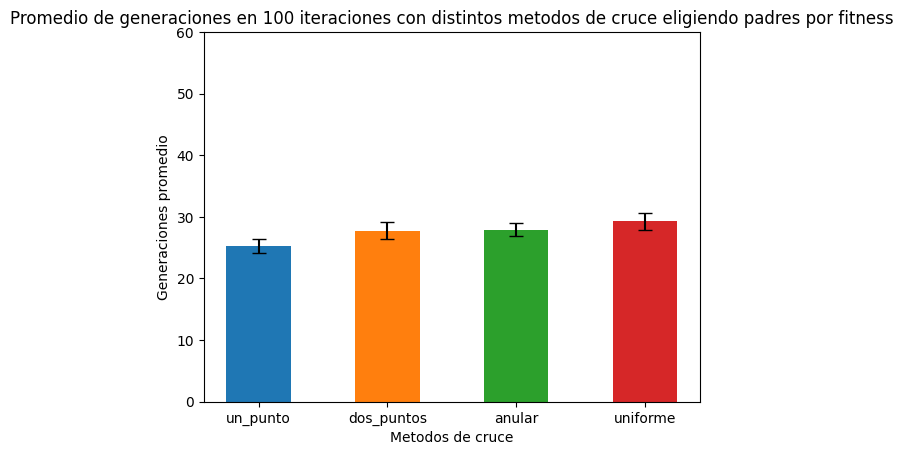

[25.2, 27.71, 27.91, 29.26]
multigen
multigen
multigen
multigen


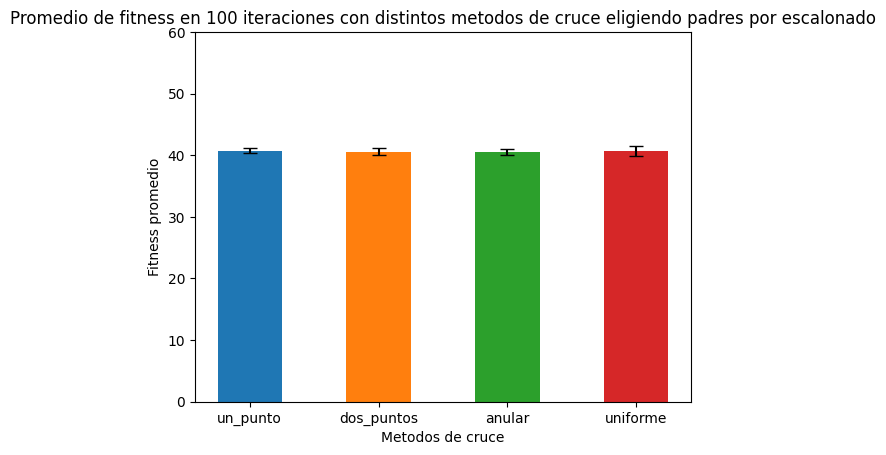

[40.6933376345675, 40.57614001823329, 40.47331590934806, 40.68695276408225]


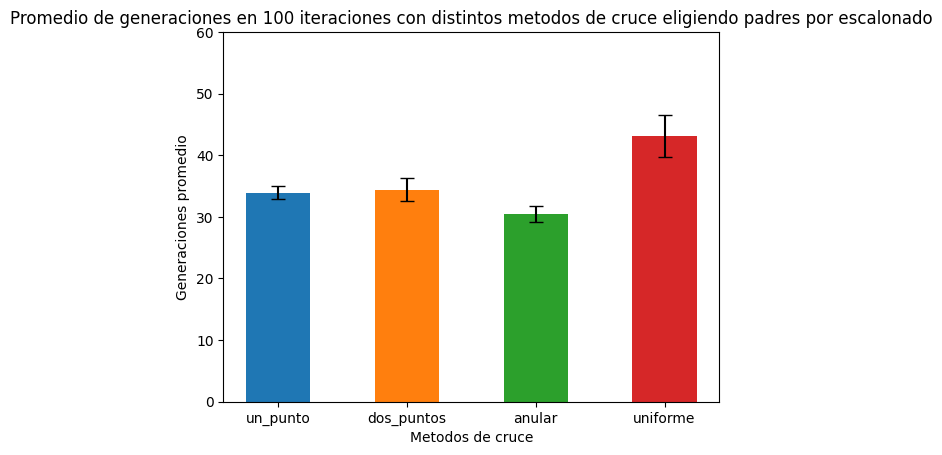

[33.92, 34.4, 30.45, 43.15]


In [8]:
#elegimos de metodos de reemplazo (3 y 4) a elite y determinista

metodos_cruce = ["un_punto", "dos_puntos", "anular", "uniforme"]
metodo_seleccion_cruce = ["fitness", "escalonado"]


for metodo_seleccion in metodo_seleccion_cruce:
    resultados = []
    generaciones = []
    varianza = []
    varianza_gen = []
    for metodo in metodos_cruce:
        crear_configuracion_cruce(metodo, metodo_seleccion)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados.append(np.mean(simulacion[:, 2]))
            generaciones.append(np.mean(simulacion[:, 0]))
            varianza.append(np.var(simulacion[:, 2]))
            varianza_gen.append(np.var(simulacion[:, 0]))
    graficar_barras_con_colores(resultados, metodos_cruce, "Metodos de cruce", "Fitness promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de cruce eligiendo padres por " + metodo_seleccion, varianza,0,60)
    print(resultados)


    min_varianza_gen = min(varianza_gen)
    graficar_barras_con_colores(generaciones, metodos_cruce, "Metodos de cruce", "Generaciones promedio", "Promedio de generaciones en 100 iteraciones con distintos metodos de cruce eligiendo padres por " + metodo_seleccion, varianza_gen/min_varianza_gen,0,60)
    print(generaciones)